In [ ]:
import os
import sys
current_dir = os.getcwd()
grand_package_root = os.path.join(current_dir,'..')
sys.path.insert(0, grand_package_root)
print(f"Répertoire racine du package ajouté à sys.path : {grand_package_root}")

Répertoire racine du package ajouté à sys.path : /users/eleves-b/2023/serena.tannous/Desktop/PHY51171/EA_Project-20251209T130744Z-3-001/EA_Project/Analysis/..


In [ ]:
import numpy as np
import numpy.random as rnd
import itertools
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure
from IPython import display
import pandas as pd
import time
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from Production.Exact_Energy import exact_1d_ising_energy, compute_relative_error
from Design.Ising import Configuration
from Production.RBM_GD import RBM
from Production.RBM_SR import RBMSR


In [ ]:
plt.rcParams.update({'font.size': 14})

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.titlesize'] = 20

# Comparing different learning rates

=== Training for learning_rate = 0.01 ===


/tmp/ipython-input-1967252188.py:238: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar


=== Training for learning_rate = 0.05 ===
=== Training for learning_rate = 0.07 ===


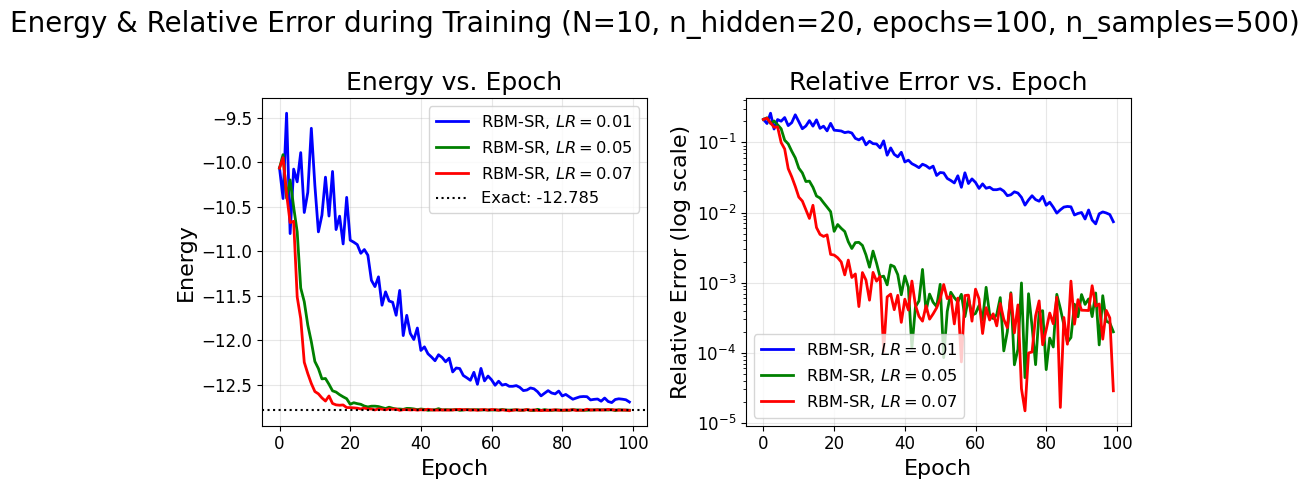

In [ ]:
# Default values are used for variables not explicitly defined in the snippet's loop:
N = 10                  # Chain length (Number of visible spins/units)
n_hidden = 20           # Number of hidden units in the RBM
epochs = 100            # Total number of training epochs
learning_rate = [0.01, 0.05, 0.07] # List of Learning Rates to iterate over (the main variable)
J = 1.0                 # Ising coupling constant (interaction strength)
H = 1               # External magnetic field
n_samples = 500         # Number of samples (Monte Carlo steps) per epoch for all runs
colors = ['blue', 'green', 'red', 'purple'] # Colors used for plotting different learning rates

# Figure Configuration (Two separate subplots: Energy and Error)
fig, (ax_energy, ax_error) = plt.subplots(1, 2, figsize=(10, 5))

# General title including fixed simulation parameters
fig.suptitle(f'Energy & Relative Error during Training (N={N}, n_hidden={n_hidden}, epochs={epochs}, n_samples={n_samples})')

# Exact Energy Calculation
# Calculate the exact ground state energy for the 1D Ising chain.
# [0] is used to extract the energy value from the function's output (assuming it returns a tuple/list).
E_exact = exact_1d_ising_energy(N, J, H, periodic=True)[0]


# Loop over Learning Rates and Plotting
for i, learning_rate_val in enumerate(learning_rate):
    print(f"=== Training for learning_rate = {learning_rate_val} ===")

    # RBMSR (Stochastic Reconfiguration)
    rbm_sr = RBMSR(n_visible=N, n_hidden=n_hidden, seed=42)

    #  RBM-SR Training
    energies_sr, rel_errors_sr = rbm_sr.train(
        n_epochs=epochs,
        n_samples_per_epoch=n_samples,
        learning_rate=learning_rate_val, # Use the current LR value
        J=J,
        H=H,
        verbose=False # Set to True if you want per-epoch output
    )

    # Plotting the Energy Curve
    color = colors[i]
    # Label for the current run, simplified LaTeX notation for the learning rate
    label_base = f'$LR={learning_rate_val}$'

    # RBM-SR (Solid line)
    ax_energy.plot(energies_sr, label=f'RBM-SR, {label_base}', color=color, linestyle='-', linewidth=2)
    # RBM (Gradient Descent) (Dashed line - currently commented out)
    # ax_energy.plot(energies_gd, label=f'RBM (GD), {label_base}', color=color, linestyle='--', linewidth=2)

    #  Plotting the Relative Error (Logarithmic scale)
    # RBM-SR (Solid line)
    ax_error.semilogy(np.abs(rel_errors_sr), label=f'RBM-SR, {label_base}', color=color, linestyle='-', linewidth=2)
    # RBM (Gradient Descent) (Dashed line - currently commented out)


# Final Adjustments for the Energy Plot
# Add a horizontal line representing the exact energy value
ax_energy.axhline(y=E_exact, color='k', linestyle=':', label=f'Exact: {E_exact:.3f}')
ax_energy.set_xlabel('Epoch')
ax_energy.set_ylabel('Energy')
ax_energy.set_title('Energy vs. Epoch')
ax_energy.grid(True, alpha=0.3)
# Place the legend in the upper right corner
ax_energy.legend(loc='upper right', fontsize='small')

#  Final Adjustments for the Relative Error Plot
ax_error.set_xlabel('Epoch')
ax_error.set_ylabel('Relative Error (log scale)')
ax_error.set_title('Relative Error vs. Epoch')
ax_error.grid(True, alpha=0.3)
# Place the legend in the best possible position
ax_error.legend(loc='best', fontsize='small')

# Adjust layout to prevent subplots from overlapping
plt.tight_layout()
plt.show()

# We compare GD and SR

=== Training for learning_rate = 0.03 ===


/tmp/ipython-input-1967252188.py:238: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar
/tmp/ipython-input-1459978721.py:221: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar


=== Training for learning_rate = 0.04 ===
=== Training for learning_rate = 0.06 ===


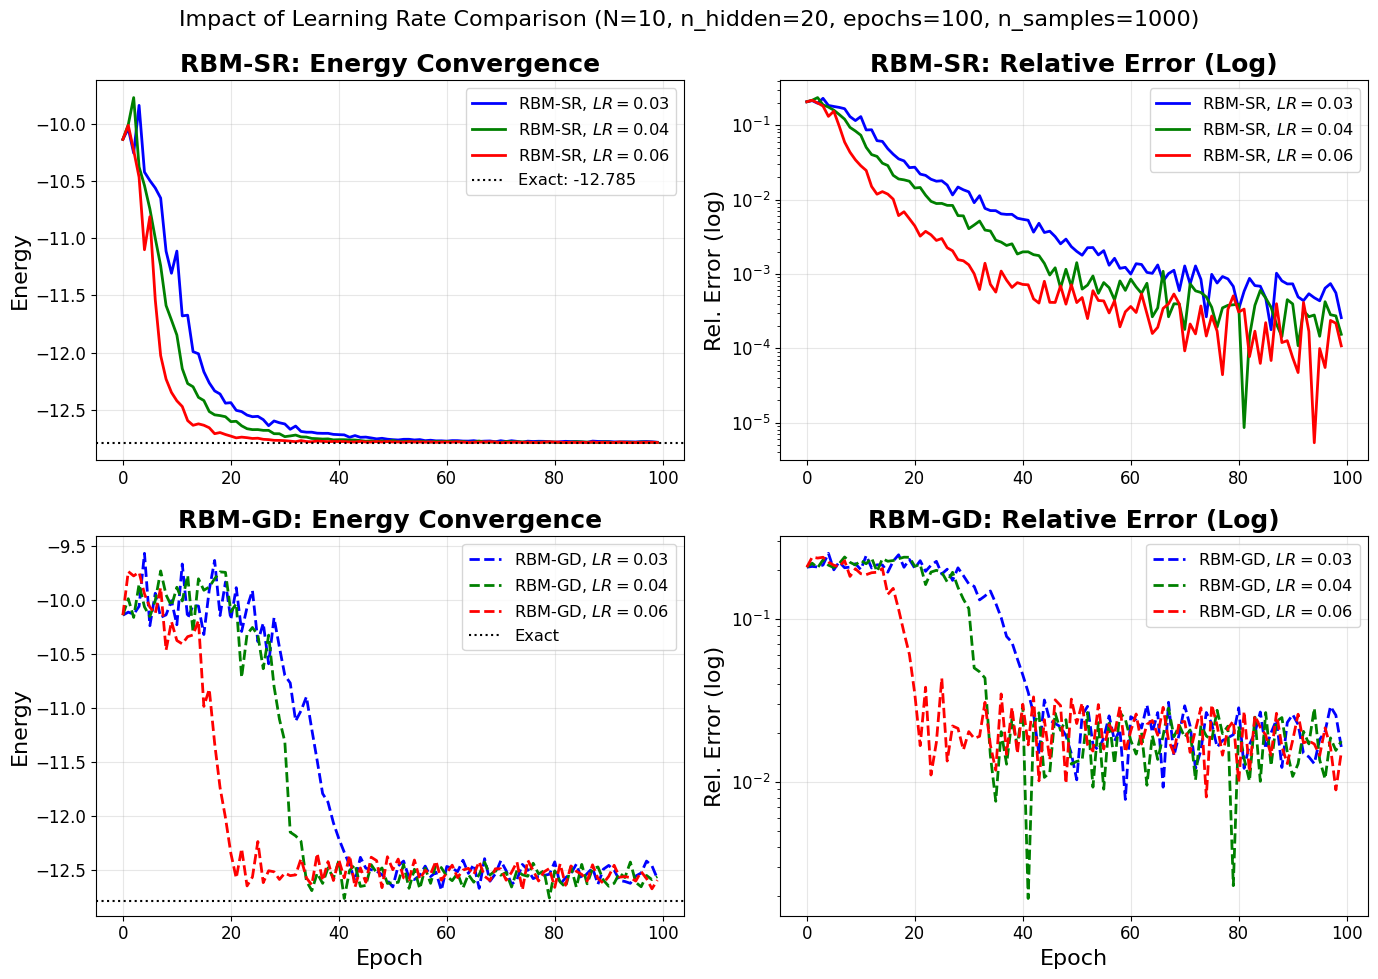

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure L, n_hidden, RBMSR, RBM, and exact_1d_ising_energy are defined/imported in your environment.

# General Parameters Definition (Fixed for this run)
N = 10                  # Chain length (Number of visible spins/units for the 1D Ising Model)
n_hidden = 20           # Number of hidden units in the RBM
epochs = 100            # Total number of training epochs
# List of Learning Rates (LR) to iterate over
learning_rate_list = [0.03, 0.04, 0.06]
J = 1.0                 # Ising coupling constant (interaction strength)
H = 1                 # External magnetic field
n_samples = 1000        # Number of samples (Monte Carlo steps) per epoch for all runs
colors = ['blue', 'green', 'red', 'purple'] # Colors used for plotting different learning rates


# Figure Configuration (2 Rows x 2 Columns)
# Row 0: RBM-SR Results | Row 1: RBM-GD Results
# Col 0: Energy Plot    | Col 1: Relative Error Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Global Title reflecting the parameters and goal of the comparison
fig.suptitle(f'Impact of Learning Rate Comparison (N={N}, n_hidden={n_hidden}, epochs={epochs}, n_samples={n_samples})', fontsize=16)

# Define Axes for Clarity
ax_sr_energy = axes[0, 0] # RBM-SR Energy Plot (Top Left)
ax_sr_error  = axes[0, 1] # RBM-SR Relative Error Plot (Top Right)
ax_gd_energy = axes[1, 0] # RBM-GD Energy Plot (Bottom Left)
ax_gd_error  = axes[1, 1] # RBM-GD Relative Error Plot (Bottom Right)

# Exact Energy Calculation
# Calculate the exact ground state energy for the 1D Ising chain.
E_exact = exact_1d_ising_energy(N, J, H, periodic=True)[0]


# Loop over Learning Rates and Training Runs
for i, learning_rate_val in enumerate(learning_rate_list):
    print(f"=== Training for learning_rate = {learning_rate_val} ===")

    # IMPORTANT: Re-initialize RBMs before each training run to ensure they start from the same initial state (if seed=42 gives the same init)
    rbm_sr = RBMSR(n_visible=N, n_hidden=n_hidden, seed=42)
    rbm_gd = RBM(n_visible=N, n_hidden=n_hidden, seed=42)

    # RBM-SR (Stochastic Reconfiguration) Training
    energies_sr, rel_errors_sr = rbm_sr.train(
        n_epochs=epochs,
        n_samples_per_epoch=n_samples,
        learning_rate=learning_rate_val,
        J=J,
        H=H,
        verbose=False # Set to True to see epoch-by-epoch progress
    )

    # RBM (Gradient Descent) Training
    energies_gd, rel_errors_gd = rbm_gd.train(
        n_epochs=epochs,
        n_samples_per_epoch=n_samples,
        learning_rate=learning_rate_val,
        J=J,
        H=H,
        verbose=False # Set to True to see epoch-by-epoch progress
    )

    # Plotting Setup
    color = colors[i]
    # Label for the current run, using LaTeX for clean presentation of the LR value
    label_base = f'$LR={learning_rate_val}$'

    #  Plot Energy (Row 0: RBM-SR)
    ax_sr_energy.plot(energies_sr, label=f'RBM-SR, {label_base}', color=color, linestyle='-', linewidth=2)

    # Plot Energy (Row 1: RBM-GD)
    # Using dashed line for standard Gradient Descent (GD)
    ax_gd_energy.plot(energies_gd, label=f'RBM-GD, {label_base}', color=color, linestyle='--', linewidth=2)

    # Plot Relative Error (Row 0: RBM-SR, Log scale)
    # np.abs is used to plot the magnitude of the error
    ax_sr_error.semilogy(np.abs(rel_errors_sr), label=f'RBM-SR, {label_base}', color=color, linestyle='-', linewidth=2)

    # Plot Relative Error (Row 1: RBM-GD, Log scale)
    ax_gd_error.semilogy(np.abs(rel_errors_gd), label=f'RBM-GD, {label_base}', color=color, linestyle='--', linewidth=2)


# Final Formatting: RBM-SR (Top Row)
# Energy Plot (Top Left)
ax_sr_energy.axhline(y=E_exact, color='k', linestyle=':', label=f'Exact: {E_exact:.3f}')
ax_sr_energy.set_title('RBM-SR: Energy Convergence', fontweight='bold')
ax_sr_energy.set_ylabel('Energy')
ax_sr_energy.grid(True, alpha=0.3)
ax_sr_energy.legend(loc='upper right', fontsize='small')

# Error Plot (Top Right)
ax_sr_error.set_title('RBM-SR: Relative Error (Log)', fontweight='bold')
ax_sr_error.set_ylabel('Rel. Error (log)')
ax_sr_error.grid(True, alpha=0.3)
ax_sr_error.legend(loc='upper right', fontsize='small')


# Final Formatting: RBM-GD (Bottom Row)
# Energy Plot (Bottom Left)
ax_gd_energy.axhline(y=E_exact, color='k', linestyle=':', label=f'Exact')
ax_gd_energy.set_title('RBM-GD: Energy Convergence', fontweight='bold')
ax_gd_energy.set_ylabel('Energy')
ax_gd_energy.set_xlabel('Epoch') # Only X-label on the bottom plots
ax_gd_energy.grid(True, alpha=0.3)
ax_gd_energy.legend(loc='upper right', fontsize='small')

# Error Plot (Bottom Right)
ax_gd_error.set_title('RBM-GD: Relative Error (Log)', fontweight='bold')
ax_gd_error.set_ylabel('Rel. Error (log)')
ax_gd_error.set_xlabel('Epoch') # Only X-label on the bottom plots
ax_gd_error.grid(True, alpha=0.3)
ax_gd_error.legend(loc='upper right', fontsize='small')

# Adjust layout to prevent subplots from overlapping
plt.tight_layout()
plt.show()

=== Training for learning_rate = 0.03 ===
Epoch   0: E_NQS =  -8.1756, E_exact = -11.6909, ε_rel = 0.300686,  Accept = 0.978
Epoch  10: E_NQS = -11.4946, E_exact = -11.6909, ε_rel = 0.016794,  Accept = 0.164
Epoch  20: E_NQS = -11.6480, E_exact = -11.6909, ε_rel = 0.003674,  Accept = 0.123
Epoch  30: E_NQS = -11.6736, E_exact = -11.6909, ε_rel = 0.001483,  Accept = 0.143
Epoch  40: E_NQS = -11.6848, E_exact = -11.6909, ε_rel = 0.000522,  Accept = 0.118
Epoch  50: E_NQS = -11.6852, E_exact = -11.6909, ε_rel = 0.000488,  Accept = 0.116
Epoch  60: E_NQS = -11.6839, E_exact = -11.6909, ε_rel = 0.000601,  Accept = 0.123
Epoch  70: E_NQS = -11.6874, E_exact = -11.6909, ε_rel = 0.000299,  Accept = 0.134
Epoch  80: E_NQS = -11.6905, E_exact = -11.6909, ε_rel = 0.000036,  Accept = 0.142
Epoch  90: E_NQS = -11.6866, E_exact = -11.6909, ε_rel = 0.000374,  Accept = 0.132
Epoch  99: E_NQS = -11.6879, E_exact = -11.6909, ε_rel = 0.000262,  Accept = 0.133


/users/eleves-b/2023/serena.tannous/Desktop/PHY51171/EA_Project-20251209T130744Z-3-001/EA_Project/Analysis/../Production/RBM_GD.py:260: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar


Epoch   0: E_NQS =  -8.1756, E_exact = -11.6909, ε_rel = 0.300686,  Accept = 0.978
Epoch  10: E_NQS =  -7.9689, E_exact = -11.6909, ε_rel = 0.318373,  Accept = 0.943
Epoch  20: E_NQS =  -8.5387, E_exact = -11.6909, ε_rel = 0.269631,  Accept = 0.842
Epoch  30: E_NQS = -11.6435, E_exact = -11.6909, ε_rel = 0.004054,  Accept = 0.095
Epoch  40: E_NQS = -11.8177, E_exact = -11.6909, ε_rel = -0.010846,  Accept = 0.076
Epoch  50: E_NQS = -11.7089, E_exact = -11.6909, ε_rel = -0.001538,  Accept = 0.093
Epoch  60: E_NQS = -11.6982, E_exact = -11.6909, ε_rel = -0.000621,  Accept = 0.091
Epoch  70: E_NQS = -11.7849, E_exact = -11.6909, ε_rel = -0.008033,  Accept = 0.094
Epoch  80: E_NQS = -11.6344, E_exact = -11.6909, ε_rel = 0.004839,  Accept = 0.095
Epoch  90: E_NQS = -11.6480, E_exact = -11.6909, ε_rel = 0.003674,  Accept = 0.098
Epoch  99: E_NQS = -11.6953, E_exact = -11.6909, ε_rel = -0.000370,  Accept = 0.101
=== Training for learning_rate = 0.04 ===
Epoch   0: E_NQS =  -8.1756, E_exact = -

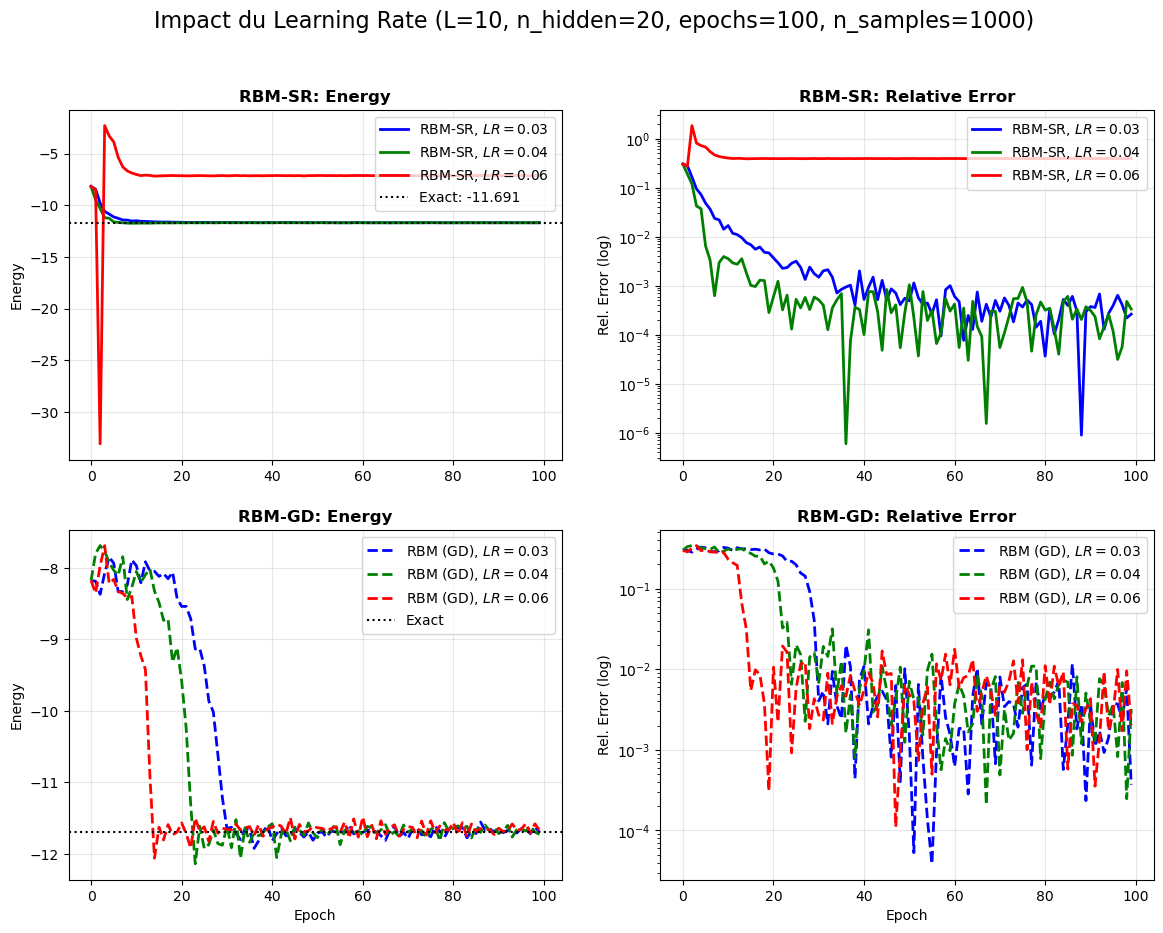

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure L, n_hidden, RBMSR, RBM, and exact_1d_ising_energy are defined/imported in your environment.

# General Parameters Definition (Fixed for this run)
L = 10                  # Chain length (Number of visible spins/units for the 1D Ising Model)
n_hidden = 20           # Number of hidden units in the RBM
epochs = 100            # Total number of training epochs
# List of Learning Rates (LR) to iterate over
learning_rate_list = [0.03, 0.04, 0.06]
J = 1.0                 # Ising coupling constant (interaction strength)
H = 0.8                 # External magnetic field
n_samples = 1000        # Number of samples (Monte Carlo steps) per epoch for all runs
colors = ['blue', 'green', 'red', 'purple'] # Colors used for plotting different learning rates


# Figure Configuration (2 Rows x 2 Columns)
# Row 0: RBM-SR Results | Row 1: RBM-GD Results
# Col 0: Energy Plot    | Col 1: Relative Error Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Global Title reflecting the parameters and goal of the comparison
fig.suptitle(f'Impact of Learning Rate Comparison (L={L}, n_hidden={n_hidden}, epochs={epochs}, n_samples={n_samples})', fontsize=16)

# Define Axes for Clarity
ax_sr_energy = axes[0, 0] # RBM-SR Energy Plot (Top Left)
ax_sr_error  = axes[0, 1] # RBM-SR Relative Error Plot (Top Right)
ax_gd_energy = axes[1, 0] # RBM-GD Energy Plot (Bottom Left)
ax_gd_error  = axes[1, 1] # RBM-GD Relative Error Plot (Bottom Right)

# Exact Energy Calculation
# Calculate the exact ground state energy for the 1D Ising chain.
E_exact = exact_1d_ising_energy(L, J, H, periodic=True)[0]


# Loop over Learning Rates and Training Runs
for i, learning_rate_val in enumerate(learning_rate_list):
    print(f"=== Training for learning_rate = {learning_rate_val} ===")

    # IMPORTANT: Re-initialize RBMs before each training run to ensure they start from the same initial state (if seed=42 gives the same init)
    rbm_sr = RBMSR(n_visible=L, n_hidden=n_hidden, seed=42)
    rbm_gd = RBM(n_visible=L, n_hidden=n_hidden, seed=42)

    # RBM-SR (Stochastic Reconfiguration) Training
    energies_sr, rel_errors_sr = rbm_sr.train(
        n_epochs=epochs,
        n_samples_per_epoch=n_samples,
        learning_rate=learning_rate_val,
        J=J,
        H=H,
        verbose=False # Set to True to see epoch-by-epoch progress
    )

    # RBM (Gradient Descent) Training
    energies_gd, rel_errors_gd = rbm_gd.train(
        n_epochs=epochs,
        n_samples_per_epoch=n_samples,
        learning_rate=learning_rate_val,
        J=J,
        H=H,
        verbose=False # Set to True to see epoch-by-epoch progress
    )

    # Plotting Setup
    color = colors[i]
    # Label for the current run, using LaTeX for clean presentation of the LR value
    label_base = f'$LR={learning_rate_val}$'

    #  Plot Energy (Row 0: RBM-SR)
    ax_sr_energy.plot(energies_sr, label=f'RBM-SR, {label_base}', color=color, linestyle='-', linewidth=2)

    # Plot Energy (Row 1: RBM-GD)
    # Using dashed line for standard Gradient Descent (GD)
    ax_gd_energy.plot(energies_gd, label=f'RBM-GD, {label_base}', color=color, linestyle='--', linewidth=2)

    # Plot Relative Error (Row 0: RBM-SR, Log scale)
    # np.abs is used to plot the magnitude of the error
    ax_sr_error.semilogy(np.abs(rel_errors_sr), label=f'RBM-SR, {label_base}', color=color, linestyle='-', linewidth=2)

    # Plot Relative Error (Row 1: RBM-GD, Log scale)
    ax_gd_error.semilogy(np.abs(rel_errors_gd), label=f'RBM-GD, {label_base}', color=color, linestyle='--', linewidth=2)


# Final Formatting: RBM-SR (Top Row)
# Energy Plot (Top Left)
ax_sr_energy.axhline(y=E_exact, color='k', linestyle=':', label=f'Exact: {E_exact:.3f}')
ax_sr_energy.set_title('RBM-SR: Energy Convergence', fontweight='bold')
ax_sr_energy.set_ylabel('Energy')
ax_sr_energy.grid(True, alpha=0.3)
ax_sr_energy.legend(loc='upper right', fontsize='small')

# Error Plot (Top Right)
ax_sr_error.set_title('RBM-SR: Relative Error (Log)', fontweight='bold')
ax_sr_error.set_ylabel('Rel. Error (log)')
ax_sr_error.grid(True, alpha=0.3)
ax_sr_error.legend(loc='upper right', fontsize='small')


# Final Formatting: RBM-GD (Bottom Row)
# Energy Plot (Bottom Left)
ax_gd_energy.axhline(y=E_exact, color='k', linestyle=':', label=f'Exact')
ax_gd_energy.set_title('RBM-GD: Energy Convergence', fontweight='bold')
ax_gd_energy.set_ylabel('Energy')
ax_gd_energy.set_xlabel('Epoch') # Only X-label on the bottom plots
ax_gd_energy.grid(True, alpha=0.3)
ax_gd_energy.legend(loc='upper right', fontsize='small')

# Error Plot (Bottom Right)
ax_gd_error.set_title('RBM-GD: Relative Error (Log)', fontweight='bold')
ax_gd_error.set_ylabel('Rel. Error (log)')
ax_gd_error.set_xlabel('Epoch') # Only X-label on the bottom plots
ax_gd_error.grid(True, alpha=0.3)
ax_gd_error.legend(loc='upper right', fontsize='small')

# Adjust layout to prevent subplots from overlapping
plt.tight_layout()
plt.show()

=== Training for learning_rate = 0.01 ===


/tmp/ipython-input-1967252188.py:238: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar
/tmp/ipython-input-1459978721.py:221: ComplexWarning: Casting complex values to real discards the imaginary part
  E_local = float(self.local_energy(temp_config))  # ensure scalar


=== Training for learning_rate = 0.03 ===
=== Training for learning_rate = 0.04 ===
=== Training for learning_rate = 0.045 ===
=== Training for learning_rate = 0.05 ===
=== Training for learning_rate = 0.06 ===
=== Training for learning_rate = 0.065 ===


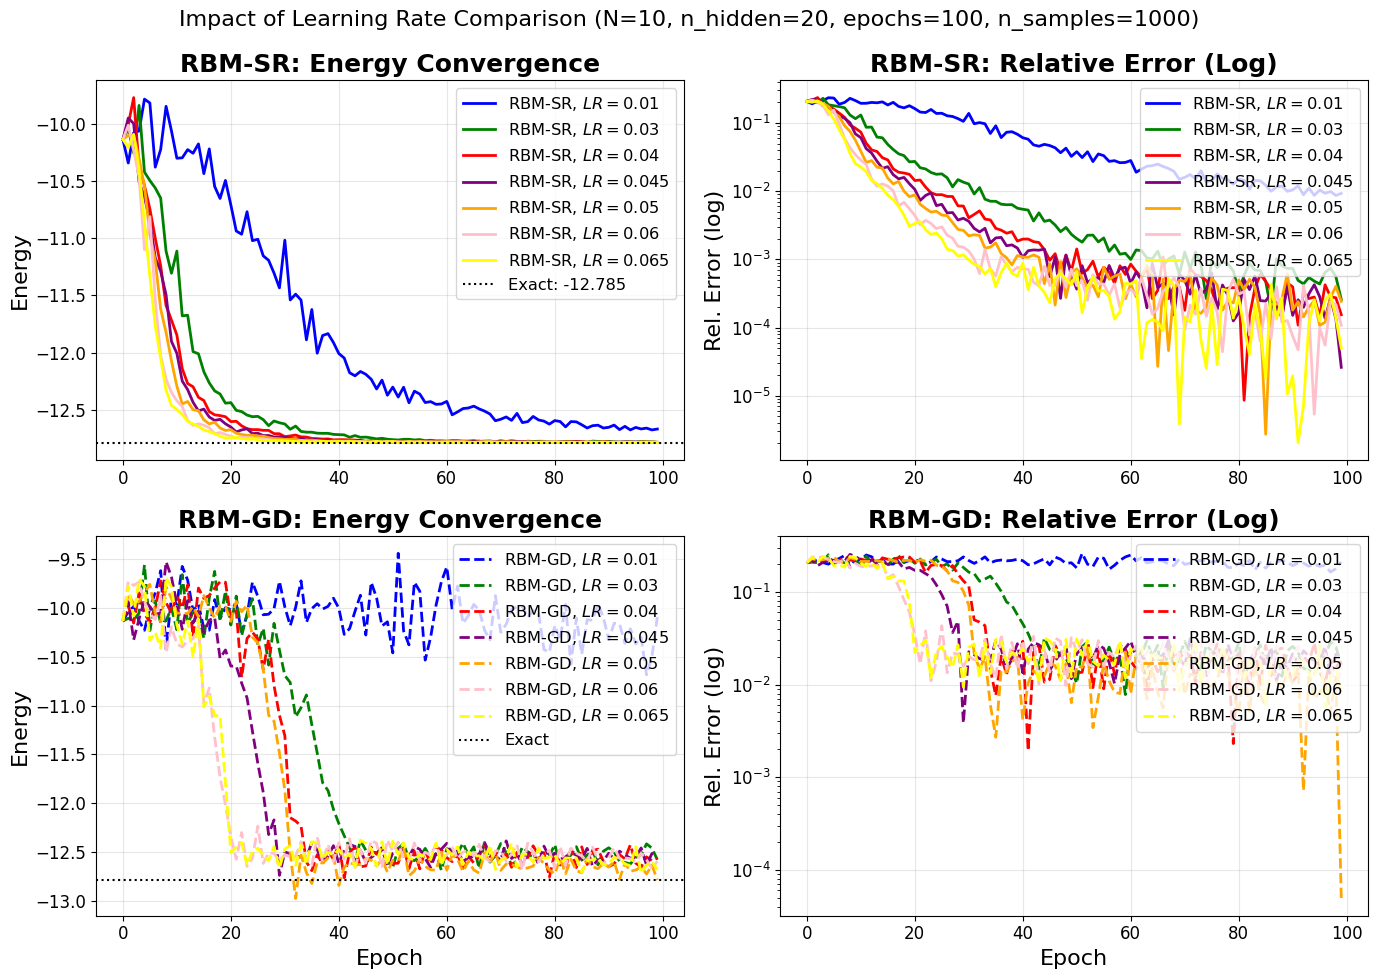

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# General Parameters Definition (Fixed for this run)
N = 10                  # Chain length (Number of visible spins/units for the 1D Ising Model)
n_hidden = 20           # Number of hidden units in the RBM
epochs = 100            # Total number of training epochs
# List of Learning Rates (LR) to iterate over
J = 1.0                 # Ising coupling constant (interaction strength)
H = 1                # External magnetic field
n_samples = 1000        # Number of samples (Monte Carlo steps) per epoch for all runs
learning_rate_list = [0.01, 0.03, 0.04, 0.045, 0.05, 0.06, 0.065]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'yellow'] # Colors used for plotting different learning rates


# Figure Configuration (2 Rows x 2 Columns)
# Row 0: RBM-SR Results | Row 1: RBM-GD Results
# Col 0: Energy Plot    | Col 1: Relative Error Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Global Title reflecting the parameters and goal of the comparison
fig.suptitle(f'Impact of Learning Rate Comparison (N={N}, n_hidden={n_hidden}, epochs={epochs}, n_samples={n_samples})', fontsize=16)

# Define Axes for Clarity
ax_sr_energy = axes[0, 0] # RBM-SR Energy Plot (Top Left)
ax_sr_error  = axes[0, 1] # RBM-SR Relative Error Plot (Top Right)
ax_gd_energy = axes[1, 0] # RBM-GD Energy Plot (Bottom Left)
ax_gd_error  = axes[1, 1] # RBM-GD Relative Error Plot (Bottom Right)

# Exact Energy Calculation
# Calculate the exact ground state energy for the 1D Ising chain.
E_exact = exact_1d_ising_energy(N, J, H, periodic=True)[0]


# Loop over Learning Rates and Training Runs
for i, learning_rate_val in enumerate(learning_rate_list):
    print(f"=== Training for learning_rate = {learning_rate_val} ===")

    # IMPORTANT: Re-initialize RBMs before each training run to ensure they start from the same initial state (if seed=42 gives the same init)
    rbm_sr = RBMSR(n_visible=N, n_hidden=n_hidden, seed=42)
    rbm_gd = RBM(n_visible=N, n_hidden=n_hidden, seed=42)

    # RBM-SR (Stochastic Reconfiguration) Training
    energies_sr, rel_errors_sr = rbm_sr.train(
        n_epochs=epochs,
        n_samples_per_epoch=n_samples,
        learning_rate=learning_rate_val,
        J=J,
        H=H,
        verbose=False # Set to True to see epoch-by-epoch progress
    )

    # RBM (Gradient Descent) Training
    energies_gd, rel_errors_gd = rbm_gd.train(
        n_epochs=epochs,
        n_samples_per_epoch=n_samples,
        learning_rate=learning_rate_val,
        J=J,
        H=H,
        verbose=False # Set to True to see epoch-by-epoch progress
    )

    # Plotting Setup
    color = colors[i]
    # Label for the current run, using LaTeX for clean presentation of the LR value
    label_base = f'$LR={learning_rate_val}$'

    #  Plot Energy (Row 0: RBM-SR)
    ax_sr_energy.plot(energies_sr, label=f'RBM-SR, {label_base}', color=color, linestyle='-', linewidth=2)

    # Plot Energy (Row 1: RBM-GD)
    # Using dashed line for standard Gradient Descent (GD)
    ax_gd_energy.plot(energies_gd, label=f'RBM-GD, {label_base}', color=color, linestyle='--', linewidth=2)

    # Plot Relative Error (Row 0: RBM-SR, Log scale)
    # np.abs is used to plot the magnitude of the error
    ax_sr_error.semilogy(np.abs(rel_errors_sr), label=f'RBM-SR, {label_base}', color=color, linestyle='-', linewidth=2)

    # Plot Relative Error (Row 1: RBM-GD, Log scale)
    ax_gd_error.semilogy(np.abs(rel_errors_gd), label=f'RBM-GD, {label_base}', color=color, linestyle='--', linewidth=2)


# Final Formatting: RBM-SR (Top Row)
# Energy Plot (Top Left)
ax_sr_energy.axhline(y=E_exact, color='k', linestyle=':', label=f'Exact: {E_exact:.3f}')
ax_sr_energy.set_title('RBM-SR: Energy Convergence', fontweight='bold')
ax_sr_energy.set_ylabel('Energy')
ax_sr_energy.grid(True, alpha=0.3)
ax_sr_energy.legend(loc='upper right', fontsize='small')

# Error Plot (Top Right)
ax_sr_error.set_title('RBM-SR: Relative Error (Log)', fontweight='bold')
ax_sr_error.set_ylabel('Rel. Error (log)')
ax_sr_error.grid(True, alpha=0.3)
ax_sr_error.legend(loc='upper right', fontsize='small')


# Final Formatting: RBM-GD (Bottom Row)
# Energy Plot (Bottom Left)
ax_gd_energy.axhline(y=E_exact, color='k', linestyle=':', label=f'Exact')
ax_gd_energy.set_title('RBM-GD: Energy Convergence', fontweight='bold')
ax_gd_energy.set_ylabel('Energy')
ax_gd_energy.set_xlabel('Epoch') # Only X-label on the bottom plots
ax_gd_energy.grid(True, alpha=0.3)
ax_gd_energy.legend(loc='upper right', fontsize='small')

# Error Plot (Bottom Right)
ax_gd_error.set_title('RBM-GD: Relative Error (Log)', fontweight='bold')
ax_gd_error.set_ylabel('Rel. Error (log)')
ax_gd_error.set_xlabel('Epoch') # Only X-label on the bottom plots
ax_gd_error.grid(True, alpha=0.3)
ax_gd_error.legend(loc='upper right', fontsize='small')

# Adjust layout to prevent subplots from overlapping
plt.tight_layout()
plt.show()